特征分析可视化工具设计用于在数据空间中可视化实例，以便检测可能影响下游拟合的特征或目标。因为ML操作高维数据集（通常至少35个），可视化工具将重点放在聚合、优化和其他技术上，以提供对数据的概述。这是Yellowbrick的意图，指导过程将允许数据科学家缩放和过滤，并探索他们的实例和维度之间的关系。
目前，我们实现了以下功能分析可视化工具：
+ 特征排名Rank Features：对单个特征和成对特征进行排名以检测协方差
+ RadViz Visualizer：沿围绕圆形排列的轴绘制数据点以检测可分离性
+ 平行坐标Parallel Coordinates：沿垂直轴将样本绘制为线以检测类或聚类
+ PCA投影：使用PCA将更高维投影到可视空间中
+ 流形可视化Manifold Visualization：使用流形学习可视化高维数据
+ 双变量关系图：（又名Jointplots）绘制特征和目标之间的二维相关性


功能分析可视化工具Transformer从scikit-learn 实现API，这意味着它们可以用作Pipeline（尤其是a VisualPipeline）中的中间转换步骤。它们以相同的方式实例化，然后在它们上调用fit和transform，从而正确绘制了实例。最后show被调用以完成并显示图像。
头文件调用如下：
```
# Feature Analysis Imports
# NOTE that all these are available for import directly from the ``yellowbrick.features`` module
from yellowbrick.features.rankd import Rank1D, Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.manifold import Manifold
```

本文如果数据集下载不下来，查看下面地址，然后放入yellowbrick安装目录\datasets\fixtures文件夹:
```
{
  "bikeshare": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/bikeshare.zip",
    "signature": "4ed07a929ccbe0171309129e6adda1c4390190385dd6001ba9eecc795a21eef2"
  },
  "hobbies": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip",
    "signature": "6114e32f46baddf049a18fb05bad3efa98f4e6a0fe87066c94071541cb1e906f"
  },
  "concrete": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/concrete.zip",
    "signature": "5807af2f04e14e407f61e66a4f3daf910361a99bb5052809096b47d3cccdfc0a"
  },
  "credit": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/credit.zip",
    "signature": "2c6f5821c4039d70e901cc079d1404f6f49c3d6815871231c40348a69ae26573"
  },
  "energy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/energy.zip",
    "signature": "174eca3cd81e888fc416c006de77dbe5f89d643b20319902a0362e2f1972a34e"
  },
  "game": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/game.zip",
    "signature": "ce799d1c55fcf1985a02def4d85672ac86c022f8f7afefbe42b20364fba47d7a"
  },
  "mushroom": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/mushroom.zip",
    "signature": "f79fdbc33b012dabd06a8f3cb3007d244b6aab22d41358b9aeda74417c91f300"
  },
  "occupancy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/occupancy.zip",
    "signature": "0b390387584586a05f45c7da610fdaaf8922c5954834f323ae349137394e6253"
  },
  "spam": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/spam.zip",
    "signature": "000309ac2b61090a3001de3e262a5f5319708bb42791c62d15a08a2f9f7cb30a"
  },
  "walking": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/walking.zip",
    "signature": "7a36615978bc3bb74a2e9d5de216815621bd37f6a42c65d3fc28b242b4d6e040"
  },
  "nfl": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/nfl.zip",
    "signature": "4989c66818ea18217ee0fe3a59932b963bd65869928c14075a5c50366cb81e1f"
  }
}
```

In [1]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 特征排名Rank Features
Rank1D和Rank2D使用各种指标对单个要素或要素对进行评估，这些指标以[-1，1]或[0，1]等级对要素进行评分，从而可以对它们进行排名。数在左下角的三角形热图上可视化，因此可以轻松识别特征对之间的模式以进行下游分析。Rank1D， Rank2D具体对比如下：

|展示器|Rank1D， Rank2D|
|-|-|
|快速使用方法|rank1d()， rank2d()|
|模型|通用线性模型|
|工作流程|特征工程和模型选择|

在此示例中，我们将使用UCI机器学习存储库中的credit默认数据集来对特征进行排名。下面的代码创建我们的实例矩阵和目标向量。


## 1.1 Rank 1D使用
特征的一维分级利用了一次仅考虑单个特征的分级算法（例如直方图分析）。默认情况下，我们使用Shapiro-Wilk算法来评估相对于特征的实例分布的正态性。然后绘制一个条形图，显示每个特征的相对等级。Shapiro-Wilk检验是由S.S.Shapiro与M.B.Wilk提出的，又被称之为W检验，主要检验研究对象是否符合正态分布。

In [2]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
# 导入数据
X, y = load_credit()
X.shape
y.shape

(30000, 23)

(30000,)

然后我们可以进行绘图，其中排名评分越高，表示该特征越接近正态分布

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


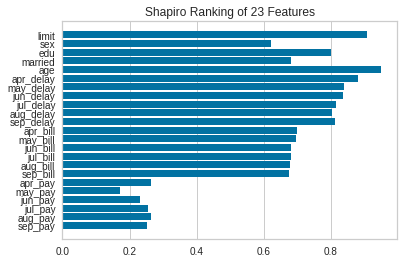

In [3]:

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
# 使用Sharpiro排名算法实例化1D可视化工具
visualizer = Rank1D(algorithm='shapiro')

# Fit the data to the visualizer
# 可视化工具拟合
visualizer.fit(X, y)     

# Transform the data
# 转换数据     
result=visualizer.transform(X)         

# Finalize and render the figure
# 显示图片    
visualizer.show();                        

## 1.2 Rank 2D
特征的二维排序使用一种一次考虑成对特征的排序算法（例如联合图分析）。然后根据分数对特征对进行排序，并使用特征共生矩阵的左下三角可视化。默认情况下，Rank2D可视化器利用Pearson相关评分检测共线性关系。

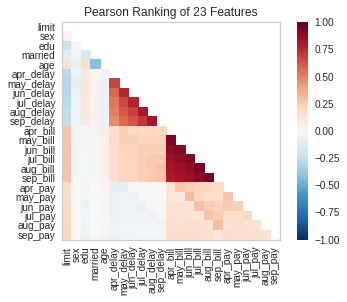

In [4]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

X, y = load_credit()
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

# Fit the data to the visualizer
# 可视化工具拟合
visualizer.fit(X, y)     

# Transform the data
# 转换数据     
result=visualizer.transform(X)         

# Finalize and render the figure
# 显示图片    
visualizer.show();    

或者，我们可以利用协方差排序算法，该算法尝试计算变量与其各自均值的偏差乘积的平均值。协方差松散地尝试检测特征之间的共线性关系。将上面的Pearson的输出与下面的协方差排名进行比较。



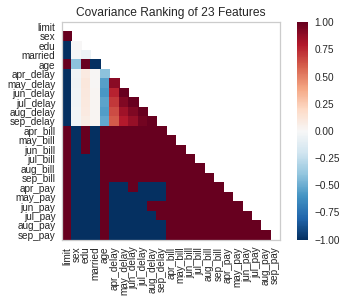

In [5]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D


X, y = load_credit()

# Instantiate the visualizer with the Covariance ranking algorithm
# #使用协方差排序算法实例化可视化工具
visualizer = Rank2D( algorithm='covariance')

# Fit the data to the visualizer
# 可视化工具拟合
visualizer.fit(X, y)     

# Transform the data
# 转换数据     
result=visualizer.transform(X)         

# Finalize and render the figure
# 显示图片    
visualizer.show();   

## 1.3 快速方法
可以使用一个线快速方法来实现类似的功能，rank1d和rank2d。这些函数实例化它们各自的可视化工具并将其显示在数据上，并立即显示它，而无需使用基于类的API。

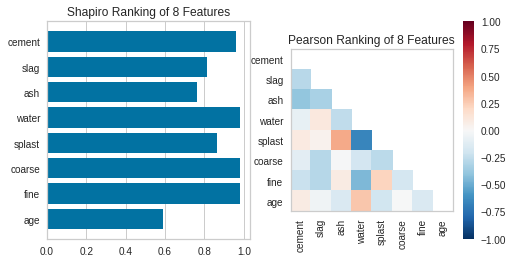

In [6]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d
from matplotlib import pyplot as plt

# Load the concrete dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show();

# 2 RadViz Visualizer
RadViz是一种多元数据可视化算法，该算法围绕圆的圆周均匀地绘制每个要素维，然后在圆的内部绘制点，以使该点将其值从中心到每个圆弧归一化。该机制允许将尽可能多的尺寸轻松地装配在圆上，从而大大扩展了可视化效果的尺寸。
数据科学家使用这种方法来检测类之间的可分性。E、 g.是否有机会从特征集中学习，或者只是噪音太大？

如果您的数据包含缺失值（numpy.nan）的行，则将不会绘制那些缺失值。换句话说，您可能无法完全了解数据。RadViz会提示DataWarning您丢失的百分比。如果确实收到此警告，则可能需要查看数据插补策略。[scikit-learn Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)是一个很好的起点。

RadViz Visualizer具体信息如下

|可视化器|RadialVisualizer|
|-|-|
|快速使用方法|radviz()|
|模型|分类，回归|
|工作流程|特征工程|



In [7]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz

# Load the classification dataset
# 导入分类数据
X, y = load_occupancy()
X.shape
y.shape

(20560, 5)

(20560,)

## 2.1 基础使用
下面代码在圆内绘制各点分类信息

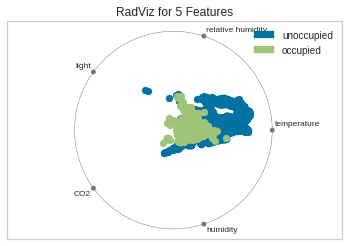

In [8]:
# Specify the target classes
# 设定分类类别
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

# Fit the data to the visualizer
visualizer.fit(X, y)       
# Transform the data    
result=visualizer.transform(X)   
# Finalize and render the figure    
visualizer.show();         

对于回归，RadViz可视化工具应该使用颜色序列来显示目标信息，而不是离散的颜色。

## 2.2 快速方法
上面的相同功能可以通过关联的快速方法来实现radviz。此方法将RadViz使用关联的参数构建对象，将其拟合，然后（可选）立即显示可视化效果。



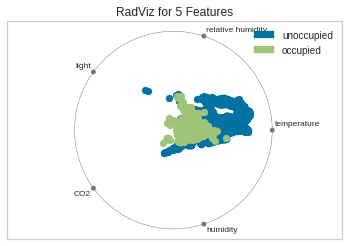

In [9]:
from yellowbrick.features.radviz import radviz
from yellowbrick.datasets import load_occupancy

#Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
radviz(X, y, classes=classes);

# 3 平行坐标Parallel Coordinates
平行坐标系是一种多维特征可视化技术，其中每个特征的垂直轴是水平复制的。实例显示为从每个垂直轴绘制到表示其在该特征值的位置的一条线段。这使得许多维度可以同时可视化；事实上，给定无限的水平空间（例如滚动窗口），技术上可以显示无限多个维度！数据科学家使用这种方法来检测具有相似类的实例簇，并记录具有高方差或不同分布的特征。我们可以在第一次加载占用分类数据集之后看到这一点。
平行坐标主要解决了在多维（大于三维）情况下数据特征无法可视化的问题。一般来说，用不同的颜色线条代表不同的类别，横轴为不同特征。纵轴为该特征的值。
若在某个特征上相同颜色折线较为集中，不同颜色有一定的间距，则说明该属性对于预测标签类别有较大的帮助。若某个属性上线条混乱，颜色混杂，则较大可能该属性对于标签类别判定没有价值。详细说明见[数据可视化---平行坐标图的定义及解读方式](https://blog.csdn.net/wyfcode/article/details/82587440)



Parallel Coordinates具体信息如下：
|可视化器|ParallelCoordinates|
|-|-|
|快速使用方法|parallel_coordinates()|
|模型|分类|
|工作流程|特征分析|

## 3.1 基础使用

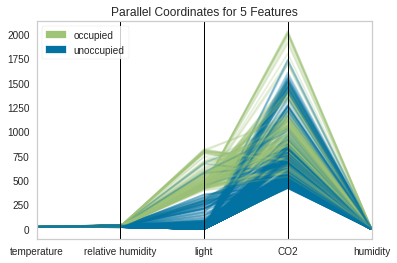

In [10]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
# 载入房屋使用率数据库
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
# 感兴趣特征
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]

# 分类结果
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
# 可视化

# feature表示要可视化的特征，
# sample表示指定要从数据显示多少个示例。如果为int，则指定要显示的最大样本数。如果为floa则指定要显示的百分比。
# shuffle表示是否随机选择样本
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

# Fit and transform the data to the visualizer
result=visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show();

但是不幸的是，当我们检查这个类时，我们可以看到每个特性的域可能使可视化难以解释。在上面的可视化中，light特征的区域变化范围远远大于为temperature的变化范围范围。为了解决这个问题，每个特征都应该被缩放或规范化，使它们近似在同一个域中。

可以使用normalize参数直接将规范化技术应用于可视化工具，而无需预先转换数据（尽管也可以这样做）。有几种normalize选择器可用；尝试使用minmax、maxabs、standard、l1或l2标准化来更改平行坐标中的透视图，如下所示：

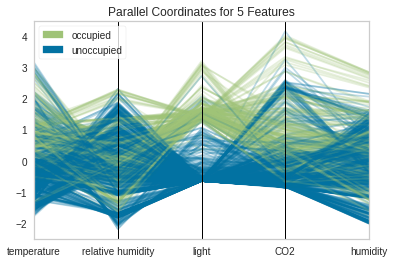

In [11]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True,
)

# Fit the visualizer and display it
result=visualizer.fit_transform(X, y)
visualizer.show();

现在我们可以看到每个特征都在[-3，3]范围内，其中特征的平均值设置为零，每个特征的单位方差在[-1，1]之间应用（因为我们通过标准normalize参数使用StandardScaler）。这个版本的平行坐标可以让我们更好地理解特征的分布。

## 3.2 加速平行坐标图绘制
绘制平行坐标可能需要很长时间，因为每个实例都由每个特征的一条线表示。更糟糕的是，这段时间花得不好，因为可视化中的大量重叠使平行坐标变得不易理解。对此，我们提出两种解决方案：
1. 使用sample=0.2和shuffle=True参数可以对图上绘制的数据集进行混洗和采样。sample参数将对数据执行统一的随机抽样，选择指定的百分比。
2. 使用该ast=True参数启用“快速绘制模式”。

“快速”绘制模式通过按类绘制每个线段，而不是分别绘制每个实例，极大地提高了平行坐标绘制算法的性能。但是，这种改进的性能需要付出一定的代价，因为所产生的可视化效果略有不同。在下面的快速绘图模式下可视化效果：

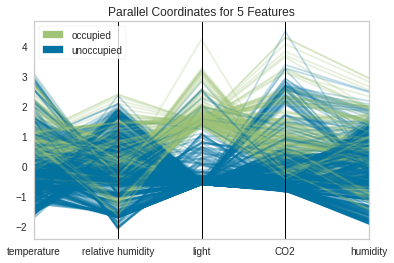

In [12]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.05, faster=True,shuffle=True,
)

# Fit the visualizer and display it
result=visualizer.fit_transform(X, y)
visualizer.show();

## 3.3 快速方法
上面的相同功能可以通过关联的快速方法来实现parallel_coordinates。此方法将ParallelCoordinates使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。

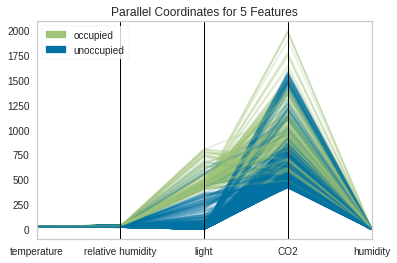

In [13]:
from yellowbrick.features.pcoords import parallel_coordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = parallel_coordinates(X, y, classes=classes, features=features,sample=0.05,shuffle=True)

# 4 PCA投影
可视化工具利用主成分分析PCA将每个主成分分解成两个高维散度的实例。PCA的使用意味着可以沿着主变差轴分析投影数据集，并可以解释为确定是否可以使用球面距离度量。


 PCA具体信息如下：
|可视化器|PCA|
|-|-|
|快速使用方法|pca_decomposition()|
|模型|分类/回归|
|工作流程|特征工程/选择|

## 4.1 基本使用


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


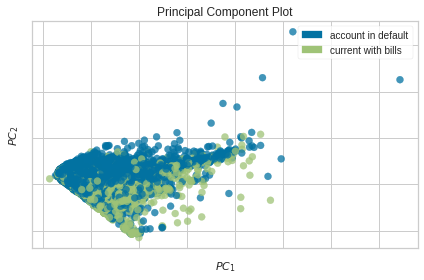

In [14]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

# scale表示是否可视化,降维为两个维度
visualizer = PCA(scale=True, classes=classes)
result=visualizer.fit_transform(X, y)
visualizer.show();

也可以在三个维度上绘制PCA投影，以尝试可视化更多主要成分并更好地了解高维度上的分布。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


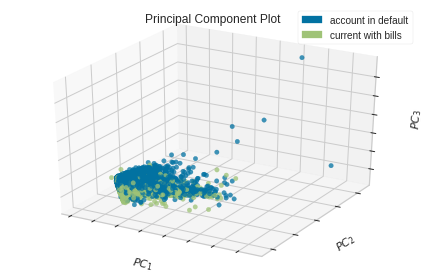

In [15]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

X, y = load_credit()
classes = ['account in default', 'current with bills']

# projection表示维度，只有二维和三维
visualizer = PCA(
    scale=True, projection=3, classes=classes
)
result=visualizer.fit_transform(X, y)
visualizer.show();

## 4.2 双标图Biplot
PCA投影可以增强为一个双点图，其点是投影实例，其向量表示高维空间中的数据结构。通过使用proj_features=True，数据集中每个特征的向量都会在散点图上沿着该特征的最大方差方向绘制。这些结构可以用来分析特征对降维的重要性，或者找到相关方差的特征，以便进一步分析。PCA的双标图具体解释见[https://bbs.pinggu.org/thread-1384773-1-1.html#opennewwindow](https://bbs.pinggu.org/thread-1384773-1-1.html#opennewwindow)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


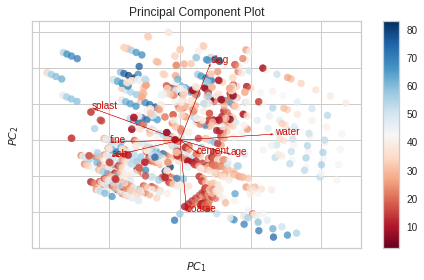

In [16]:
from yellowbrick.features import PCA

# Load the concrete dataset
X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True)
result=visualizer.fit_transform(X, y)
visualizer.show();

三维biplot如下

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


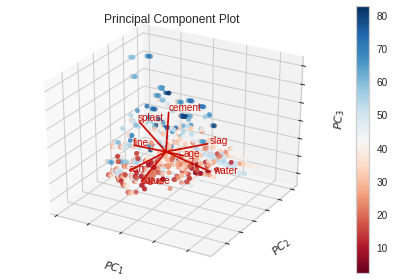

In [17]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True, projection=3)
result=visualizer.fit_transform(X, y)
visualizer.show();

## 4.3 快速方法
上面的相同功能可以通过关联的快速方法来实现pca_decomposition。此方法将PCA使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


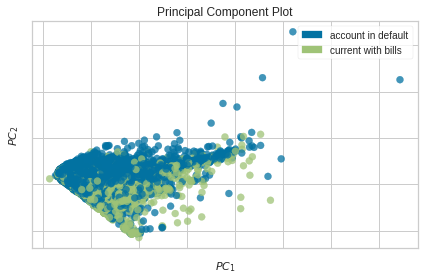

In [18]:
from yellowbrick.features import pca_decomposition

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

# Create, fit, and show the visualizer
pca_decomposition(
    X, y, scale=True, classes=classes
);

# 5 流形可视化Manifold Visualization
流行学习简单来说就是降维方法的一种，具体介绍见[流形学习(manifold learning)综述](https://www.cnblogs.com/lzhu/p/9146976.html)。

流形可视化工具使用流形学习提供高维可视化，将由多个维度描述的实例嵌入到2维，从而允许创建显示数据中潜在结构的散点图。与PCA和SVD等分解方法不同，流形通常使用最近邻方法进行嵌入，这样就可以捕捉到否则会丢失的非线性结构。然后，可以分析产生的投影的噪声或可分性，以确定是否可以在数据中创建决策空间。


流形可视化具体信息如下：
|可视化器|Manifold|
|-|-|
|快速使用方法|manifold_embedding()|
|模型|分类/回归|
|工作流程|特征工程|

通过将流形指定为可视化工具的字符串，流形可视化工具允许访问所有当前可用的scikit流行方法实现。当前实现的默认流形方法如下：
|方法|说明|
|-|-|
|"lle"|局部线性嵌入（LLE）使用许多局部线性分解来保留全局非线性结构。|
|"ltsa"|LTSA LLE：局部切线空间对齐与LLE相似，因为它使用局部性来保留邻域距离。|
|"hessian"|Hessian LLE一种LLE正则化方法，该方法在每个邻域应用基于hessian的二次形式|
|"modified"|修改后的LLE将正则化参数应用于LLE。|
|"isomap"|Isomap寻求较低维的嵌入，以保持每个实例之间的几何距离。|
|"mds"|MDS：多维缩放使用相似性来绘制在嵌入中彼此靠近的点。|
|"spectral"|频谱使用图形表示嵌入低维流形的离散逼近。|
|"tsne"|t-SNE：将点的相似度转换为概率，然后使用这些概率创建嵌入。|

每种流形算法产生不同的嵌入，并利用底层数据的不同属性。一般来说，它需要对新数据进行多次尝试，以确定最适合数据中潜在结构的流形。但是请注意，不同的流形算法有不同的时间、复杂性和资源需求。流形可以用于许多类型的问题，散点图中使用的颜色可以描述目标实例。在无监督或聚类问题中，使用单一颜色来显示结构和重叠。在分类问题中，每一类都使用离散颜色。在回归问题中，颜色图可以用来描述点作为回归值的热图。

## 5.1 离散目标
在分类或聚类问题中，实例可以用离散的标签来描述——监督问题中的类或类别，或者在无监督版本中它们所属的簇。流形通过为每个标签指定颜色并在图例中显示标签来可视化这一点。

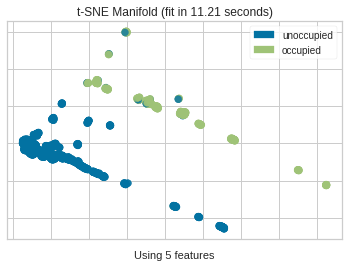

In [19]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import train_test_split

# Load the classification dataset
X, y = load_occupancy()
X.shape
classes = ["unoccupied", "occupied"]

# 数据集太大，影响速度，所以提取部分数据
_, X,  _, y = train_test_split(X, y, test_size = 0.1, random_state = 7)
X.shape

# Instantiate the visualizer
# manifold选择实例方法
viz = Manifold(manifold="tsne", classes=classes)

# Fit the data to the visualizer
result=viz.fit_transform(X, y)  
# Finalize and render the figure
viz.show();               

可视化还显示生成嵌入所需的时间；如您所见，即使对于相对较小的数据集，这也可能需要很长时间。一个技巧是使用StandardScalar缩放数据；另一个技巧是对实例进行采样（例如使用train_test_split来保持类分层），或者过滤特征以减少数据集中的稀疏性。

一种常见的机制是用于SelectKBest选择与目标数据集具有统计相关性的要素。例如，我们可以使用f_classif分数在入住数据集中找到3个最佳特征。

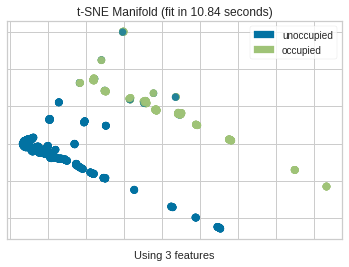

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import train_test_split

# Load the classification dataset
X, y = load_occupancy()
X.shape
classes = ["unoccupied", "occupied"]

# 数据集太大，影响速度，所以提取部分数据
_, X,  _, y = train_test_split(X, y, test_size = 0.1, random_state = 7)
X.shape

# Create a pipeline
model = Pipeline([
    ("selectk", SelectKBest(k=3, score_func=f_classif)),
    ("viz", Manifold(manifold="tsne", classes=classes)),
])

result=model.fit_transform(X, y)          # Fit the data to the model
model.named_steps['viz'].show();   # Finalize and render the figure

## 5.2 连续目标
对于回归目标或将颜色指定为连续值的热图，请指定target_type="continuous"。请注意，默认情况下target_type="auto"已设置参数，该参数 通过计算中的唯一值的数量来确定目标是离散的还是连续的y。



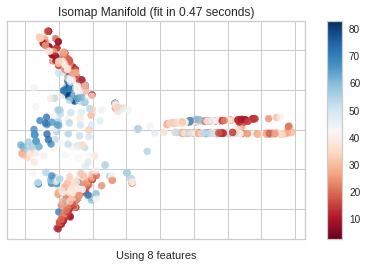

In [21]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate the visualizer
# 许多流形算法都是基于最近邻居的，对于这些算法，此参数指定要在嵌入中使用的邻居的数量。
# 如果未为这些嵌入指定n_neighbors，则将其设置为5并发出警告。如果流形算法不使用最近的邻居，则忽略此参数。
viz = Manifold(manifold="isomap", n_neighbors=10)

result=viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

## 5.3 快速方法
上面的相同功能可以通过关联的快速方法来实现manifold_embedding。此方法将Manifold使用关联的参数构建对象，将其拟合，然后（可选）立即显示可视化效果。



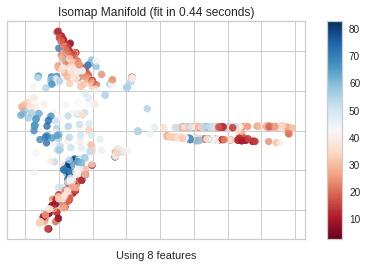

In [22]:
from yellowbrick.features import manifold_embedding
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate the visualizer
manifold_embedding(X, y, manifold="isomap", n_neighbors=10);

# 6 双变量关系图
有时对于特征分析，您只需要一个散点图来确定数据的分布。机器学习对高维数据进行操作，因此必须降维。因此，这些可视化通常用作大型可视化工具的基础；但是，您也可以使用它们在机器学习分析期间快速绘制数据。JointPlotVisualizer根据目标绘制一个特征，并通过每个轴上的直方图显示每个特征的分布。

流形可视化具体信息如下：
|可视化器|JointPlot|
|-|-|
|快速使用方法|joint_plot()|
|模型|分类/回归|
|工作流程|特征工程/选择|

## 6.1 基础使用

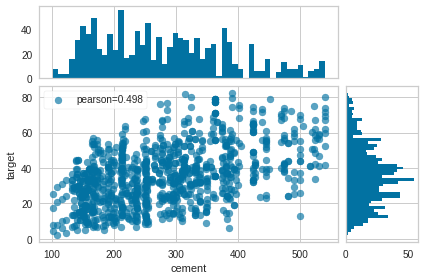

In [23]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
# columns表示指定的特征名
visualizer = JointPlotVisualizer(columns="cement")

result=visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

该JointPlotVisualizer还可以用来比较两个特征。



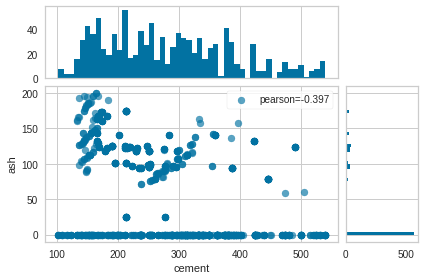

In [24]:
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=["cement", "ash"])

result=visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

另外，在JointPlotVisualizer很多点的情况下，可以用六边形绘制。



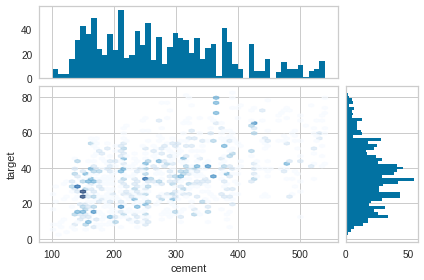

In [25]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
# kind设置点的显示方法，scatter或者hexbin。默认scatter
visualizer = JointPlotVisualizer(columns="cement", kind="hexbin")

result=visualizer.fit_transform(X, y)        # Fit and transform the data
# Finalize and render the figure
visualizer.show();                     

## 6.2 快速方法
上面的相同功能可以通过关联的快速方法来实现joint_plot。此方法将JointPlot使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。




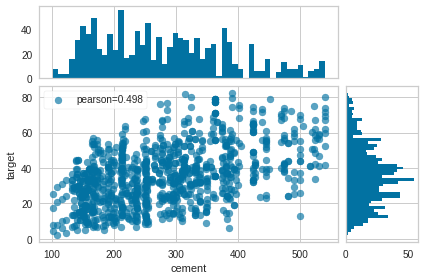

In [26]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import joint_plot

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = joint_plot(X, y, columns="cement");

# 7 参考
[https://www.jianshu.com/p/e202069489a6](https://www.jianshu.com/p/e202069489a6)

[https://www.scikit-yb.org/en/latest/api/features/rankd.html](https://www.scikit-yb.org/en/latest/api/features/rankd.html)

[https://www.scikit-yb.org/en/latest/api/features/radviz.html](https://www.scikit-yb.org/en/latest/api/features/radviz.html)

[https://www.scikit-yb.org/en/latest/api/features/pcoords.html](https://www.scikit-yb.org/en/latest/api/features/pcoords.html)

[https://www.scikit-yb.org/en/latest/api/features/pca.html](https://www.scikit-yb.org/en/latest/api/features/pca.html)

[https://www.scikit-yb.org/en/latest/api/features/manifold.html](https://www.scikit-yb.org/en/latest/api/features/manifold.html)

[https://www.scikit-yb.org/en/latest/api/features/jointplot.html](https://www.scikit-yb.org/en/latest/api/features/jointplot.html)